In [1]:
import sys  
from os import path
import numpy as np
import pandas as pd

# sys.path.append('../src/')

# from modules.sys_functions.find_files_in_folder import search_dirs

In [2]:
results_pickle_dit = "D:\\Igor\\Research_USF\\University of South Florida\\Mao, Wenbin - Igor\\Febio-Models\\Active-Models\\PAQ\\Hex8-Hex20\\results\\pickles"

hex8_file = path.join(results_pickle_dit, "Hex-8.pickle")
hex20_file = path.join(results_pickle_dit, "Hex-20.pickle")

hex8_df = pd.read_pickle(hex8_file)
hex20_df = pd.read_pickle(hex20_file)




In [3]:
hex8_df["type"] = "hex8"
hex20_df["type"] = "hex20"


In [4]:
df = pd.concat([hex8_df, hex20_df], sort=False).drop_duplicates(
        ).reset_index(drop=True)

In [5]:
df

,param_val,timestep,volume,perc_vol,pressure,type
0,0.00,0.004,122.755469,0.000005,0.213333,hex8
1,0.00,0.008,122.756997,0.000017,0.426667,hex8
2,0.00,0.012,122.758836,0.000032,0.640000,hex8
3,0.00,0.016,122.760875,0.000049,0.853333,hex8
4,0.00,0.020,122.762955,0.000066,1.066667,hex8
...,...,...,...,...,...,...
411,0.25,0.084,60.146881,-0.510316,4.480000,hex20
412,0.25,0.088,58.547522,-0.523337,4.693333,hex20
413,0.25,0.092,56.984268,-0.536064,4.906667,hex20
414,0.25,0.096,55.443284,-0.548610,5.120000,hex20


In [6]:
a = hex8_df["volume"] - hex20_df["volume"]

In [7]:
a

0     -0.073272
1     -0.074567
2     -0.077816
3     -0.083069
4     -0.090268
         ...   
213         NaN
214         NaN
215         NaN
216         NaN
217         NaN
Name: volume, Length: 218, dtype: float64

In [8]:
df_grouped = df.groupby(["param_val"])

Text(0, 0.5, 'Volume %')

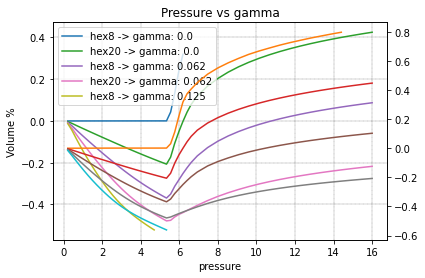

In [9]:
from matplotlib import pyplot as plt
grid = plt.grid(color='r', linestyle='-', linewidth=2)
ax = plt.gca()
# fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all')
legends = []
for (name, group) in df_grouped:
    hex8 = group.loc[group["type"] == "hex8"]
    hex8.plot(kind='line',x='pressure',y='perc_vol',ax=ax, title="Pressure vs gamma")
    legends.append("hex8 -> gamma: {v}".format(v=np.round(name,3)))

    hex20 = group.loc[group["type"] == "hex20"]
    hex20.plot(kind='line',x='pressure',y='perc_vol',ax=ax, title="Pressure vs gamma", secondary_y=True)
    legends.append("hex20 -> gamma: {v}".format(v=np.round(name,3)))
    # group.plot(kind='line',x='pressure',y='perc_vol', ax=ax, secondary_y=True)
    # group.plot(x =['pressure', 'pressure'], y=['volume', 'perc_vol'], title=name, secondary_y=True, grid=grid)
ax.grid(color='k', linestyle='--', linewidth=0.25)
ax.legend(legends)
ax.set_ylabel("Volume %")

Text(0, 0.5, 'Volume %')

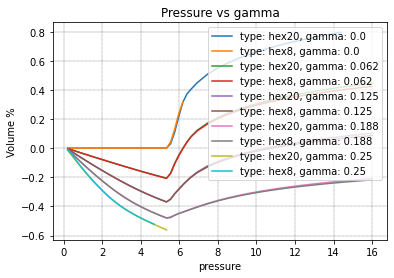

In [10]:
grid = plt.grid(color='r', linestyle='-', linewidth=2)
ax = plt.gca()
legends = []
for (gamma, group) in df_grouped:
    mesh_group = group.groupby(["type"])
    for (mesh, mgroup) in mesh_group:
        mgroup.plot(kind='line',x='pressure',y='perc_vol',ax=ax, title="Pressure vs gamma")
        legends.append("type: {t}, gamma: {v}".format(v=np.round(gamma,3), t=mesh))

    # group.plot(kind='line',x='pressure',y='perc_vol', ax=ax, secondary_y=True)
    # group.plot(x =['pressure', 'pressure'], y=['volume', 'perc_vol'], title=name, secondary_y=True, grid=grid)
ax.grid(color='k', linestyle='--', linewidth=0.25)
ax.legend(legends)
ax.set_ylabel("Volume %")

In [11]:
df_grouped2 = df.groupby(["param_val", "pressure"])
new_vec = []
for (name, group) in df_grouped2:
    hex8 = group.loc[group["type"] == "hex8"]
    hex20 = group.loc[group["type"] == "hex20"]

    # print(name, hex8["volume"].values)
    hex8val = hex8["volume"].values[0] if len(hex8["volume"].values) > 0 else 0
    hex20val = hex20["volume"].values[0] if len(hex20["volume"].values) > 0 else 0

    

    if hex8val != 0 and hex20val != 0:
        group["diff"] = ((hex8val - hex20val) / hex20val) * 100
        group["diff2"] = ((hex20val - hex8val) / hex8val) * 100

    else:
        group["diff"] = 0.0
    # print(hex8["volume"], hex20["volume"], group["diff"])


    new_vec.append(group)

new_df = pd.concat(new_vec)


In [12]:
new_df_grouped = new_df.groupby(["param_val"])

Text(0, 0.5, '% Error')

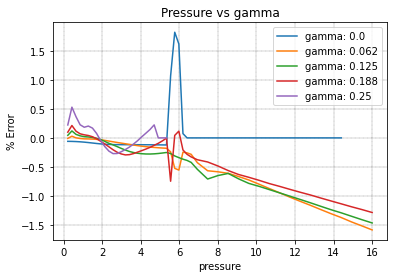

In [13]:
from matplotlib import pyplot as plt
grid = plt.grid(color='r', linestyle='-', linewidth=2)
ax = plt.gca()
# fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all')
legends = []
for (name, group) in new_df_grouped:
    group.plot(kind='line',x='pressure',y='diff',ax=ax, title="Pressure vs gamma")
    legends.append("gamma: {v}".format(v=np.round(name,3)))

ax.grid(color='k', linestyle='--', linewidth=0.25)
ax.legend(legends)
ax.set_ylabel("% Error")


Text(0, 0.5, '% Error')

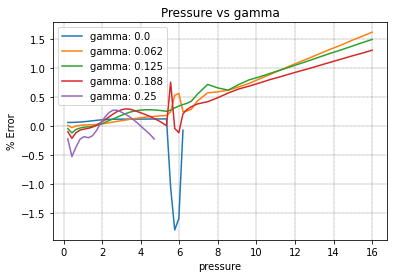

In [14]:
from matplotlib import pyplot as plt
grid = plt.grid(color='r', linestyle='-', linewidth=2)
ax = plt.gca()
# fig, (ax1, ax2) = plt.subplots(1, 2, sharex='all', sharey='all')
legends = []
for (name, group) in new_df_grouped:
    group.plot(kind='line',x='pressure',y='diff2',ax=ax, title="Pressure vs gamma")
    legends.append("gamma: {v}".format(v=np.round(name,3)))

ax.grid(color='k', linestyle='--', linewidth=0.25)
ax.legend(legends)
ax.set_ylabel("% Error")